# Clasificación de videojuegos por popularidad

In [14]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [16]:
df = pd.read_csv("vgchartz-2024.csv")

# Mostrar las primeras filas para ver la estructura
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [17]:
#Obteniendo mayor información del dataset
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [18]:
# Viendo si existen valores nulos en el dataset
print(df.isnull().sum())

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


Analizando los valores y las variables anteriormente mostradas, podemos observar que hay ciertos datos que pueden hacer que no hagamos un buen modelo, por lo que procederé a hacer una limpieza de los datos.

LIMPIEZA DE LOS DATOS CON VALORES NULOS O CON VALORES NO MANEJABLES

In [23]:
# Eliminando columnas con demasiados valores nulos
df_clean = df.drop(columns=["last_update"])

# Eliminando filas donde no hay información de ventas
df_clean = df_clean.dropna(subset=["total_sales"])

# Convirtiendo release_date a formato datetime
df_clean["release_date"] = pd.to_datetime(df_clean["release_date"], errors="coerce")

# Rellenando valores nulos en developer con "Desconocido"
df_clean["developer"] = df_clean["developer"].fillna("Desconocido")


In [20]:
# Verificar nuevamente valores nulos
print(df_clean.isnull().sum())

df.head()

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score    14796
total_sales         0
na_sales         6285
jp_sales        12196
pal_sales        6098
other_sales      3794
release_date       90
dtype: int64


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


Para establecer una variable que muestre la popularidad de un videojuego, procederé a basarme en una variable, la cual es el total de ventas, la cual es un claro indicador de qué tan consumido es un videojuego y por lo tanto que tan popular es.

In [26]:
# Definiendo función para categorizar popularidad
def clasificar_popularidad(ventas):
    if ventas >= 10:
        return "Muy Popular"
    elif ventas >= 1:
        return "Moderadamente Popular"
    else:
        return "Menos Popular"

# Aplicando la clasificación
df_clean["popularidad"] = df_clean["total_sales"].apply(clasificar_popularidad)

# Verificando la distribución de categorías
print(df_clean["popularidad"].value_counts())

popularidad
Menos Popular            17417
Moderadamente Popular     1483
Muy Popular                 22
Name: count, dtype: int64


Las características del dataset que se considerarán para crear el modelo son las siguientes, esto debido a que son las que se encuentran mayormente ligadas a la popularidad.

In [30]:


# Seleccionando características para el modelo
features = ["console", "genre", "publisher", "developer", "release_date", "critic_score"]
df_model = df_clean[features].copy()

# Convirtiendo la fecha de lanzamiento en el año de lanzamiento
df_model["release_year"] = df_clean["release_date"].dt.year

# Eliminando la columna original de fecha
df_model = df_model.drop(columns=["release_date"])

# Convirtiendoo variables categóricas en numéricas
encoder = LabelEncoder()
for col in ["console", "genre", "publisher", "developer"]:
    df_model[col] = encoder.fit_transform(df_model[col])

# Variable objetivo
y = df_clean["popularidad"]

# Dividiendo en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2, random_state=42)

# Entrenando el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Haciendo predicciones
y_pred = model.predict(X_test)

# Evaluando el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9315719947159842
Classification Report:
                        precision    recall  f1-score   support

        Menos Popular       0.95      0.98      0.96      3489
Moderadamente Popular       0.60      0.34      0.43       291
          Muy Popular       0.25      0.20      0.22         5

             accuracy                           0.93      3785
            macro avg       0.60      0.51      0.54      3785
         weighted avg       0.92      0.93      0.92      3785



Puede que no todo el modelo sea perfecto de acuerdo a los resultados expuestos, esto debido a que estoy considerando la columna de critic_score, la cual considero que también es de importancia para el modelo, independientemente de que tratar con esta última columna sea un poco más conflictivo debido a que no se puede hacer un ajuste que convenga con los datos faltantes.


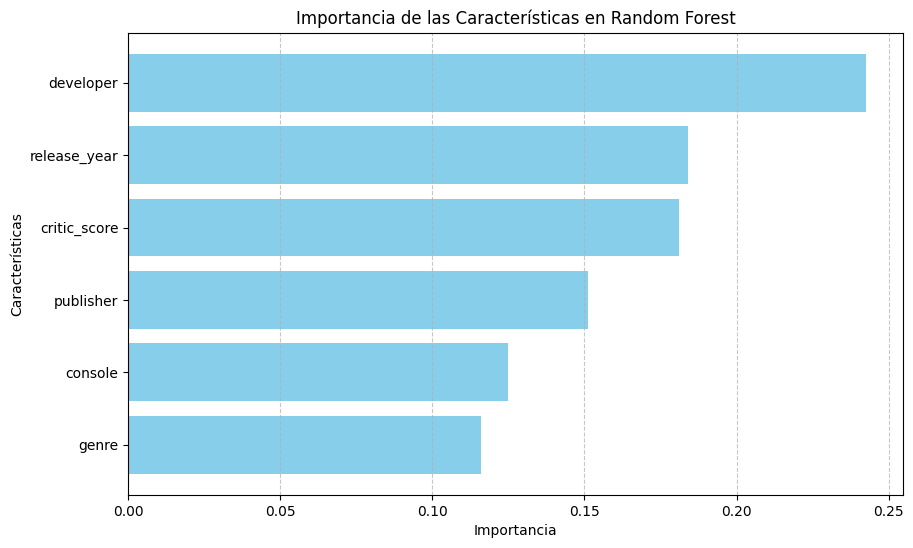

In [31]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = df_model.columns

# Crear un dataframe con la importancia
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Ordenar la importancia de las características
importance_df = importance_df.sort_values(by="Importance", ascending=True)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características en Random Forest")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()




In [32]:
# Precisión en los datos de entrenamiento
train_accuracy = model.score(X_train, y_train)

# Precisión en los datos de prueba
test_accuracy = model.score(X_test, y_test)

print(f"Precisión en entrenamiento: {train_accuracy}")
print(f"Precisión en prueba: {test_accuracy}")


Precisión en entrenamiento: 0.9956398229503864
Precisión en prueba: 0.9315719947159842


Después de aplicar el modelo, la presición del mismo tanto en los datos de entrenamiento como en los datos de prueba fue bastante elevada, podría incluso incrementarse mayormente, pero quizá se necesitaría de algún otro método adicional, no obstante se comprueba que con este todo salió muy bien.
